![alt text](Capture8.png "Title")

###  <font color=mediumpurple>Working with MNIST Dataset</font> ###

__In this question, you are given the MNIST dataset, which consists of 70,000 images of digits handwritten by students and employees of US Census Bureau.__


__Note: problem is colored as medium purple while my answers are in slate blue__

####  <font color=slateblue>Importing Neccessary Libraries</font> ####

In [1]:
from sklearn.datasets import fetch_openml

import numpy as np
import random
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tabulate import tabulate

from sklearn.model_selection import train_test_split as trainTestSplitter
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score as accScore
from sklearn.metrics import roc_curve as ROC 
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import cross_val_score as crossValScore


You are supposed to perform a binary classification task, separating digit 4 from others (0,1,2,3,5,6,7,8,9). The data could be downloaded using the code below:

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### <font color=mediumpurple>1:</font> ###

__In the first step, you are going to get acquainted with the dataset.__

Randomly, plot three digits from the dataset.

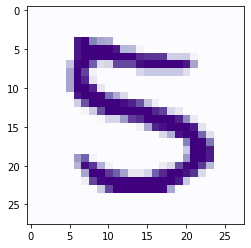

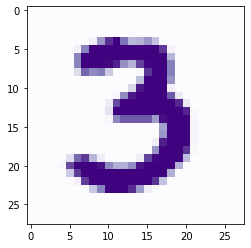

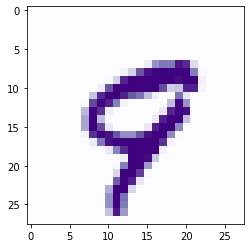

In [3]:
reshapeSize = int(np.sqrt(len(X[0][:]))) 
n1, n2, n3 = random. sample(range(0, 70000), 3) #Choosing 3 random images to show

plt.imshow(X[n1][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()
plt.imshow(X[n2][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()  
plt.imshow(X[n3][:].reshape(reshapeSize, reshapeSize), cmap=plt.cm.Purples)
plt.show()


### <font color=mediumpurple>2:</font> ###
__In the second step, you should build your dataset. Do as follows:__
* Split your training and testing dataset (80% and 20%).
* Set the random_state to 10.
* As your goal is to identify digit 4, create the target vectors for this classification task  <font color=mediumpurple>(note that you are training a binary classifier)</font>

#### <font color=slateblue>Answer:</font> ####
To do so, first of all, the trainTestSplitter function is used based on the given information, so that train and test datasets are in hand. Then, among the labels, the ones with 4 as their label are called "goal", while others are called "other". 

In [4]:
trainData, testData, trainLabels, testLabels = trainTestSplitter(X, y, 
                                                                 test_size =0.2, random_state=10)

#Defining Desired Labels:
goal = 1
others = 0

trainLabels = [goal if trainLabels[i]=='4' else others for i in range(len(trainLabels))]
testLabels = [goal if testLabels[i]=='4' else others for i in range(len(testLabels))]

### <font color=mediumpurple>3:</font> ###
__Do the classification task using a <font color=mediumpurple>Gaussian Naive Bayes Classifier</font>__

#### <font color=slateblue>Answer:</font> ####
The model is set and fitted to the train data and their labels. (After all functions, the implementaion of Gaussian Naive Bayesian Classifier is given.) 

In [5]:
def giveClassPred(classType, trainData, trainLabels, testData):
  myClf = classType.fit(trainData, trainLabels) 
  predLabels = myClf.predict(testData)
  
  return myClf, predLabels

### <font color=mediumpurple>4:</font> ###
__Calculate the following values:__
* Confusion Matrix
* Accuracy
* Sensitivity
* Specificity
* Precision
* Recall

#### <font color=slateblue>Answer:</font> ####
Each of these values are evaluated by both employing and not employing the implemented methods in "sklearn". Each of the cells are for one of these bullet points: 

#### <font color=slateblue>Confusion Matrix:</font> ####

In [6]:
def calcConfMat(testLabels, predLabels):
  #Evaluating Confusion Matrix without SKLearn:
  classLabels = np.unique(testLabels)  
  myConfMat = np.array([[np.sum((testLabels == classLabels[i]) & 
                                (predLabels == classLabels[j])) 
  for j in range(len(classLabels))] for i in  range(len(classLabels))]) 

  #Evaluating Confusion Matrix with SKLearn:
  confMat = confusion_matrix(testLabels, predLabels)

  return myConfMat, confMat

In [7]:
def plotConfMatrix(matrix, classes, normalize=False, title='Confusion matrix', 
                   cmap=plt.cm.Purples):
  
  plt.figure(figsize = (5,5))
  plt.imshow(matrix, interpolation='nearest', cmap=cmap)
  plt.title(title, fontsize=10, fontweight='bold')
  plt.colorbar()

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5], 
            ['', '', classes[0], '', '', '', classes[1], '', ''])
  
  if normalize:
      matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
      plt.text(j, i, matrix[i, j], ha='center', va='center', color='lavender' 
                if matrix[i,j]>thresh else 'mediumpurple')
      
  plt.tight_layout()
  plt.ylabel('True Labels', fontsize=10, fontweight='bold')
  plt.xlabel('Predicted Lables', fontsize=10, fontweight='bold')
  plt.show()

#### <font color=slateblue>Plot Tables:</font> ####

In [8]:
def plotTable(clms, clmDataHeadears, alignSize):
  data = []
  
  for i in range(len(clms[list(clms.keys())[0]])):
      dataElement = []
      for key in clms.keys():
          dataElement.append(clms[key][i])
      data.append(dataElement)
      
  print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                  colalign=["center"]*alignSize))

#### <font color=slateblue>Accuracy:</font> ####

In [9]:
def calcAcc(confMat, testLabels, predLabels):
  FP = confMat.sum(axis=0) - np.diag(confMat)  
  FN = confMat.sum(axis=1) - np.diag(confMat)
  TP = np.diag(confMat)
  TN = confMat.sum() - (FP + FN + TP)
  
  #Evaluating Accuracy without SKLearn:
  myAcc = np.mean((TP+TN)/(TP+FP+FN+TN))*100

  #Evaluating Accuracy with SKLearn:
  skAcc = accScore(testLabels, predLabels)*100

  plotTable({1:["Without Sklearn", "With Sklearn"], 2:['{:1.2f}'.format(myAcc), 
                                                        '{:1.2f}'.format(skAcc)]}, 
            ['Method', 'Accuracy'], 2)

#### <font color=slateblue>Sensitivity:</font> ####

In [10]:
def calcSens(confMat, testLabels, predLabels):
  TP = np.diag(confMat)
  FN = confMat.sum(axis=1) - np.diag(confMat)
  
  #Evaluating Sensivity without SKLearn:
  mySens = TP/(TP+FN)

  #Evaluating Sensivity with SKLearn:
  skSens4 = metrics.recall_score(testLabels, predLabels, pos_label=goal)
  skSensOther = metrics.recall_score(testLabels, predLabels, pos_label=others)

  plotTable({1:["Without Sklearn", "With Sklearn"], 
              2:['{:1.2f}'.format(mySens[1]), '{:1.2f}'.format(skSens4)],
              3:['{:1.2f}'.format(mySens[0]), '{:1.2f}'.format(skSensOther)]}, 
            ['Method', 'Sensivity to 4', 'Sensivity to Others'], 3) 

#### <font color=slateblue>Specificity:</font> ####

In [11]:
def calcSpec(confMat, testLabels, predLabels):
    
  FP = confMat.sum(axis=0) - np.diag(confMat)  
  FN = confMat.sum(axis=1) - np.diag(confMat)
  TP = np.diag(confMat)
  TN = confMat.sum() - (FP + FN + TP)
  
  #Evaluating Specificity without SKLearn:
  mySpec = TN/(TN+FP) 

  plotTable({1:["Without Sklearn"], 
              2:['{:1.2f}'.format(mySpec[0])],
              3:['{:1.2f}'.format(mySpec[1])]}, 
            ['Method', 'Specificity to 4', 'Specificity to Others'], 3)

#### <font color=slateblue>Precision:</font> ####

In [12]:
def calcPrecision(confMat, testLabels, predLabels):  
  FP = confMat.sum(axis=0) - np.diag(confMat) 
  TP = np.diag(confMat)
  
  #Evaluating Precision without SKLearn:
  myPres = TP/(TP+FP)

  #Evaluating Precision without SKLearn:
  skPres4 = metrics.precision_score(testLabels, predLabels, pos_label=goal)
  skPresOther = metrics.precision_score(testLabels, predLabels, pos_label=others)

  plotTable({1:["Without Sklearn", "With Sklearn"], 
              2:['{:1.2f}'.format(myPres[1]), '{:1.2f}'.format(skPres4)],
              3:['{:1.2f}'.format(myPres[0]), '{:1.2f}'.format(skPresOther)]}, 
            ['Method', 'Precision to 4', 'Precision to Others'], 3)

#### <font color=slateblue>Recall:</font> ####

In [13]:
def calcRecall(confMat, testLabels, predLabels):   
  FN = confMat.sum(axis=1) - np.diag(confMat)
  TP = np.diag(confMat)
  
  #Evaluating Recall without SKLearn:
  myRecall = TP/(TP+FN)

  #Evaluating Sensivity with SKLearn:
  skRecall4 = metrics.recall_score(testLabels, predLabels, pos_label=goal)
  skRecallOther = metrics.recall_score(testLabels, predLabels, pos_label=others)

  plotTable({1:["Without Sklearn", "With Sklearn"], 
              2:['{:1.2f}'.format(myRecall[1]), '{:1.2f}'.format(skRecall4)],
              3:['{:1.2f}'.format(myRecall[0]), '{:1.2f}'.format(skRecallOther)]}, 
            ['Method', 'Recall of 4', 'Recall of Others'], 3) 

Note that recall and sensivity are the same measure but with different names! 


### <font color=mediumpurple>5:</font> ###
__Now plot <font color=mediumpurple>the ROC curve</font>, then calculate <font color=mediumpurple>Area Under ROC (AUROC)</font>__

In [14]:
def ROCandAUC(testLabels, predLabels):
  falseAlarm, hit, threshold = ROC(testLabels, predLabels)

  plt.plot(falseAlarm, hit, color='mediumpurple')
  plt.title("ROC")
  plt.xlabel("False Alarm")
  plt.ylabel("Hit")
  plt.show()

  print('The calculated AUC is: %1.4f' %(AUC(testLabels, predLabels)))

### <font color=mediumpurple>6:</font> ###
__Finally, apply a 5-fold cross validation, and report your <font color=mediumpurple>mean and std values</font>.__

In [15]:
def accCross(myClf, X, newY):
  acc = crossValScore(myClf, X, newY, cv=5, scoring='accuracy')
  print('Our accuracy is: %.2f%% +- %.2f%%' %(np.mean(acc)*100,np.std(acc)*100))

### <font color=mediumpurple>7:</font> ###
__How are your results?__
#### <font color=slateblue>Answer:</font> ####
Note that in orderto improve this classifier's performance, the variance parameter is set.

##### <font color=slateblue>*Accuracy:</font> #####
As the below results suggest, the accuracy of detecting "4" is about 69.21%. This means that among the total number of predictions by this classifier, only in 69.21% of the times the prediction is accurate. 
##### <font color=slateblue>*Precision:</font> #####
As the below table suggests, percision values are 24% and 99% for detecting "4" and detecting other numbers, respectively. Owing to the fact that precision shows the ration between true positive and all positives, among all the times this classifier detects "4" as a label for a handwriting pictures, only 24% of the times "4" is the true label as well. The same story holds for other numbers in 99% of the times.
##### <font color=slateblue>*Recall:</font> #####
As the below table suggests, recall values are 94% and 66% for detecting "4" and detecting other numbers, respectively. Owing to the fact that recall measures the model's accuracy in identifying true positive, among all the pictures containing "4", in 94% of the times, "4" is the classifier's prediction as well. The same story holds for other numbers in 66% of the times. 

##### <font color=slateblue>*Sensitivity and Specificity:</font> #####
Sensitivity is another name for recall, and specificity is the same as the other class of the sensivity. Meaning, in our example, sensivity to "4" is the same as specificity to other numbers and vice versa. 


__Is <font color=mediumpurple>Gaussian Naive Bayes Classifier</font> a good one for this problem?__ 
#### <font color=slateblue>Answer:</font> ####
Depending on what we aim to do this answer may differ. If our goal is to minimize erronous detections, recall does not give an insight about how reliable our model is performing. In addition, precision does not give us the vision to grasp how accurate our model in performing. Besides, while using accuracy as a defining metric for our model does make sense intuitively, but more often than not, it is always advisable to use the former two as well. 
Therefore, depenting on what we aim to achieve and what are the costs we can decide whether a model is performing well or not. For instance, if we want to detect as much "4"s as possible, this means that we seek for high recall, which this model is giving us. However, if our goal is to eliminate errors in detecting "4", we are aiming for high precision in "4" label's detection, which is not the case for this model. 

### __Repeat all the steps using <font color=mediumpurple>Nearest Centroid Classifier</font> and <font color=mediumpurple>Logistic Regression Classifier</font>.__ ### 
* You just need to make some changes to step 3!
* You should report all the values in steps 4, 5, and 6

## <font color=mediumpurple>Gaussian Naive Bayes Classifier</font> ##

************************************************************4************************************************************


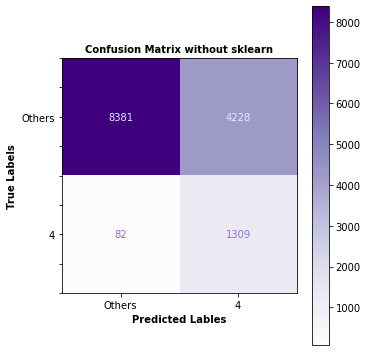

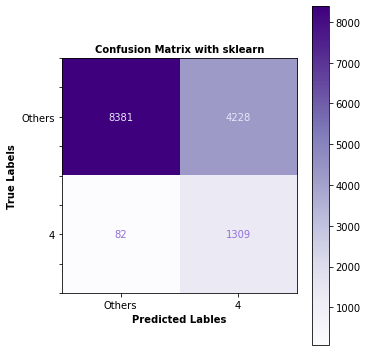

╒═════════════════╤════════════╕
│     Method      │  Accuracy  │
╞═════════════════╪════════════╡
│ Without Sklearn │   69.21    │
├─────────────────┼────────────┤
│  With Sklearn   │   69.21    │
╘═════════════════╧════════════╛
╒═════════════════╤══════════════════╤═══════════════════════╕
│     Method      │  Sensivity to 4  │  Sensivity to Others  │
╞═════════════════╪══════════════════╪═══════════════════════╡
│ Without Sklearn │       0.94       │         0.66          │
├─────────────────┼──────────────────┼───────────────────────┤
│  With Sklearn   │       0.94       │         0.66          │
╘═════════════════╧══════════════════╧═══════════════════════╛
╒═════════════════╤════════════════════╤═════════════════════════╕
│     Method      │  Specificity to 4  │  Specificity to Others  │
╞═════════════════╪════════════════════╪═════════════════════════╡
│ Without Sklearn │        0.94        │          0.66           │
╘═════════════════╧════════════════════╧════════════════════

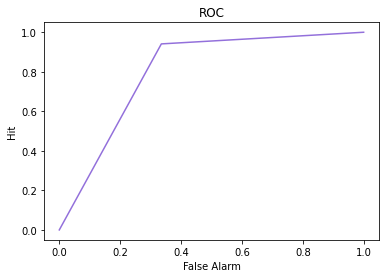

The calculated AUC is: 0.8029
*************************************************************************************************************************
************************************************************6************************************************************
Our accuracy is: 69.28% +- 0.55%
*************************************************************************************************************************


In [16]:
#######################################3#######################################
myClf, predLabels = giveClassPred(GaussianNB(var_smoothing=1e-03), trainData, trainLabels, testData)
#######################################4#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'4'+'*'*60)
myConfMat, confMat = calcConfMat(testLabels, predLabels)
plotConfMatrix(myConfMat, ['Others', 4], title='Confusion Matrix without sklearn')
plotConfMatrix(confMat, ['Others', 4],title='Confusion Matrix with sklearn')
calcAcc(confMat, testLabels, predLabels)
calcSens(confMat, testLabels, predLabels)
calcSpec(confMat, testLabels, predLabels)
calcPrecision(confMat, testLabels, predLabels)
calcRecall(confMat, testLabels, predLabels)
print("\n Using sklearn's report we get: \n")
print(metrics.classification_report(testLabels, predLabels,
                                    target_names=['Others', 'goal']))
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################5#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'5'+'*'*60)
ROCandAUC(testLabels, predLabels)
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################6#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'6'+'*'*60)
newY = [goal if y[i]=='4' else others for i in range(len(y))]
accCross(myClf, X, newY)
print('\033[1m' +  "\033[1;36m" + '*'*121)

## <font color=mediumpurple>Nearest Centroid Classifier</font> ##

************************************************************4************************************************************


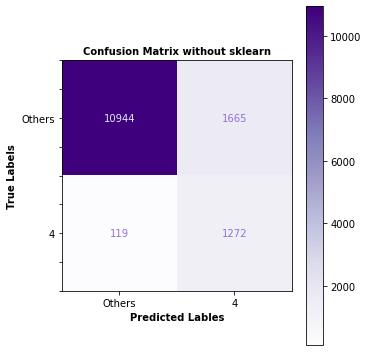

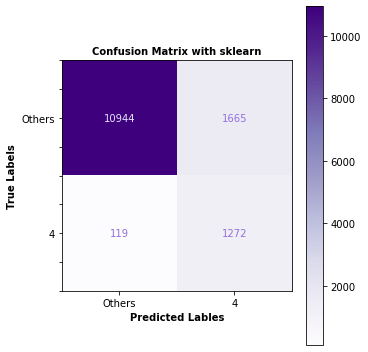

╒═════════════════╤════════════╕
│     Method      │  Accuracy  │
╞═════════════════╪════════════╡
│ Without Sklearn │   87.26    │
├─────────────────┼────────────┤
│  With Sklearn   │   87.26    │
╘═════════════════╧════════════╛
╒═════════════════╤══════════════════╤═══════════════════════╕
│     Method      │  Sensivity to 4  │  Sensivity to Others  │
╞═════════════════╪══════════════════╪═══════════════════════╡
│ Without Sklearn │       0.91       │         0.87          │
├─────────────────┼──────────────────┼───────────────────────┤
│  With Sklearn   │       0.91       │         0.87          │
╘═════════════════╧══════════════════╧═══════════════════════╛
╒═════════════════╤════════════════════╤═════════════════════════╕
│     Method      │  Specificity to 4  │  Specificity to Others  │
╞═════════════════╪════════════════════╪═════════════════════════╡
│ Without Sklearn │        0.91        │          0.87           │
╘═════════════════╧════════════════════╧════════════════════

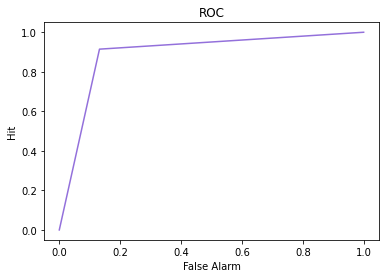

The calculated AUC is: 0.8912
*************************************************************************************************************************
************************************************************6************************************************************
Our accuracy is: 87.06% +- 0.37%
*************************************************************************************************************************


In [17]:
#######################################3#######################################
myClf, predLabels = giveClassPred(NearestCentroid(metric='euclidean'), trainData, 
                                  trainLabels, testData)
#######################################4#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'4'+'*'*60)
myConfMat, confMat = calcConfMat(testLabels, predLabels)
plotConfMatrix(myConfMat, ['Others', 4], title='Confusion Matrix without sklearn')
plotConfMatrix(confMat, ['Others', 4],title='Confusion Matrix with sklearn')
calcAcc(confMat, testLabels, predLabels)
calcSens(confMat, testLabels, predLabels)
calcSpec(confMat, testLabels, predLabels)
calcPrecision(confMat, testLabels, predLabels)
calcRecall(confMat, testLabels, predLabels)
print("\n Using sklearn's report we get: \n")
print(metrics.classification_report(testLabels, predLabels,
                                    target_names=['Others', 'goal']))
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################5#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'5'+'*'*60)
ROCandAUC(testLabels, predLabels)
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################6#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'6'+'*'*60)
newY = [goal if y[i]=='4' else others for i in range(len(y))]
accCross(myClf, X, newY)
print('\033[1m' +  "\033[1;36m" + '*'*121)

## <font color=mediumpurple>Logistic Regression Classifier</font> ##

************************************************************4************************************************************


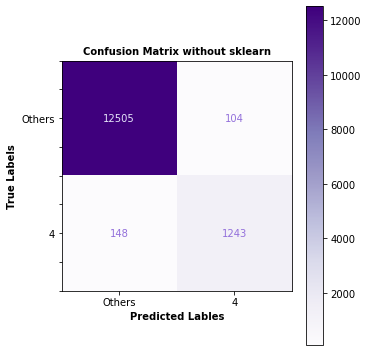

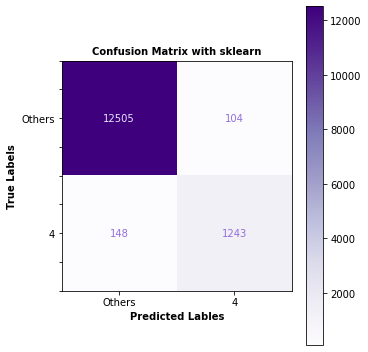

╒═════════════════╤════════════╕
│     Method      │  Accuracy  │
╞═════════════════╪════════════╡
│ Without Sklearn │    98.2    │
├─────────────────┼────────────┤
│  With Sklearn   │    98.2    │
╘═════════════════╧════════════╛
╒═════════════════╤══════════════════╤═══════════════════════╕
│     Method      │  Sensivity to 4  │  Sensivity to Others  │
╞═════════════════╪══════════════════╪═══════════════════════╡
│ Without Sklearn │       0.89       │         0.99          │
├─────────────────┼──────────────────┼───────────────────────┤
│  With Sklearn   │       0.89       │         0.99          │
╘═════════════════╧══════════════════╧═══════════════════════╛
╒═════════════════╤════════════════════╤═════════════════════════╕
│     Method      │  Specificity to 4  │  Specificity to Others  │
╞═════════════════╪════════════════════╪═════════════════════════╡
│ Without Sklearn │        0.89        │          0.99           │
╘═════════════════╧════════════════════╧════════════════════

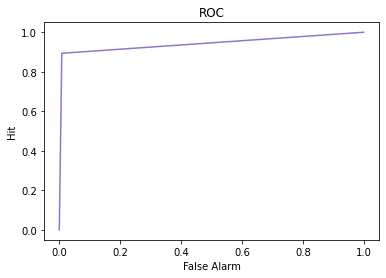

The calculated AUC is: 0.9427
*************************************************************************************************************************
************************************************************6************************************************************
Our accuracy is: 98.22% +- 0.15%
*************************************************************************************************************************


In [18]:
#######################################3#######################################
scaler = preprocessing.StandardScaler().fit(trainData)
trainDataScaled = scaler.transform(trainData)
testDataScaled = scaler.transform(testData)
XScaled = scaler.transform(X)

myClf, predLabels = giveClassPred(LogisticRegression(tol=100, max_iter=1000), 
                                  trainDataScaled, trainLabels, testDataScaled)
#######################################4#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'4'+'*'*60)
myConfMat, confMat = calcConfMat(testLabels, predLabels)
plotConfMatrix(myConfMat, ['Others', 4], title='Confusion Matrix without sklearn')
plotConfMatrix(confMat, ['Others', 4],title='Confusion Matrix with sklearn')
calcAcc(confMat, testLabels, predLabels)
calcSens(confMat, testLabels, predLabels)
calcSpec(confMat, testLabels, predLabels)
calcPrecision(confMat, testLabels, predLabels)
calcRecall(confMat, testLabels, predLabels)
print("\n Using sklearn's report we get: \n")
print(metrics.classification_report(testLabels, predLabels,
                                    target_names=['Others', 'goal']))
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################5#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'5'+'*'*60)
ROCandAUC(testLabels, predLabels)
print('\033[1m' +  "\033[1;36m" + '*'*121)
#######################################6#######################################
print('\033[1m' +  "\033[1;36m" + '*'*60+'6'+'*'*60)
newY = [goal if y[i]=='4' else others for i in range(len(y))]
accCross(myClf, XScaled, newY)
print('\033[1m' +  "\033[1;36m" + '*'*121)

### __Which one is better? Report it.__ ###
#### <font color=slateblue>Answer:</font> ####
As was discussed above regarding how good Gaussian Naive Classifier is, this answer totally depends on what we mean by better. 
#### <font color=slateblue>*Precision:</font> ####
As was dicsucced earlier, in order to detect less erronous "4"s, our precision in detecting "4" needs to be maximized. Between the above models, the classifier based on "Logistic Regression" gives us the highest percision. Therefore, if our measurement is precision, the last classifier is the best one.
#### <font color=slateblue>*Recall:</font> ####
As was dicsucced earlier, if we want to detect most of the pictures containing 4, as number 4, no matter we detect other numbers inaccurately as four (error in other numbers' detecting is not essential for us), we need to seek for a classifier providing the highest recall rate for "4". Amoung all of them, the first classifier achieves this goal. Therefore, if our measurement is recall, the best classifier is the first one. 
#### <font color=slateblue>*Accuracy and AUC:</font> ####
As was dicsucced earlier, if our measurement is how accurate our model is, we seek to achieve a high accuracy rate. Therefore, among the given classifiers, the last one is the best one, since it has the highest accuracy. The same story holds for its AUC. 

